## **TIKI Marketplace Data Analyst Test**

### 1. Business Prolem

Domain: A standard Seller on Tiki usually go through these below stages:

-Sign-up -> Seller’s Account Activated by Tiki Team -> Listing Product -> Stocking to make product(s) available for sales -> Having transaction
Evaluating how the processing performence is and recommending what Tiki needs to impove ?

### 2. Exploratory Data Analysis

#### 2.1 Data Overview

In [1]:
import pandas as pd

In [2]:
data_df = pd.read_csv("tiki_test.csv")
print("Overview top 10 records!")
data_df.head(10)

Overview top 10 records!


,Seller ID,Seller's Vertical,Sign-up Time,Activation Time,1st Listing,1st Salable,1st Transaction
0,1,Electronic,9/20/2017,2/2/2018,2/7/2018,10/6/2018,10/10/2018
1,2,BBFF,8/19/2017,5/24/2018,8/13/2018,8/14/2018,9/2/2018
2,3,BBFF,12/4/2017,5/4/2018,10/6/2018,10/10/2018,10/12/2018
3,4,BBFF,10/16/2017,4/23/2018,7/4/2018,7/10/2018,7/10/2018
4,5,BBFF,12/13/2017,7/25/2018,8/30/2018,8/31/2018,9/14/2018
5,6,LifeStyle,1/4/2018,3/21/2018,6/11/2018,9/19/2018,9/20/2018
6,7,BBFF,1/26/2018,3/6/2018,10/1/2018,10/2/2018,10/14/2018
7,8,LifeStyle,11/29/2017,5/10/2018,7/26/2018,7/28/2018,8/4/2018
8,9,BBFF,11/28/2017,4/20/2018,7/23/2018,7/24/2018,8/12/2018
9,10,BBFF,2/2/2018,3/30/2018,3/30/2018,9/27/2018,9/30/2018


#### 2.2 Cleaning data

In [3]:
# Removing Null or Missing data
data_df = data_df.dropna()

# Removing dupplicate row
data_df = data_df.drop_duplicates()

#### 2.3 Processing data

In [4]:
# Format datetime value
data_df["Sign-up Time"] = pd.to_datetime(data_df["Sign-up Time"])
data_df["Activation Time"] = pd.to_datetime(data_df["Activation Time"])
data_df["1st Listing"] = pd.to_datetime(data_df["1st Listing"])
data_df["1st Salable"] = pd.to_datetime(data_df["1st Salable"])
data_df["1st Transaction"] = pd.to_datetime(data_df["1st Transaction"])

In [5]:
# Numer of processing days between each stages

# The number days from Sign-Up to Activate
data_df["sign2activate"] = data_df["Activation Time"] - data_df["Sign-up Time"]
# The number days from Sign-Up to Activate
data_df["sign2list"] = data_df["1st Listing"] - data_df["Sign-up Time"]
# The number days from Sign-Up to Activate
data_df["sign2trans"] = data_df["1st Transaction"] - data_df["Sign-up Time"]
# The number days from Sign-Up to Activate
data_df["activate2list"] = data_df["1st Listing"] - data_df["Activation Time"]
# The number days from Sign-Up to Activate
data_df["sale2trans"] = data_df["1st Transaction"] - data_df["1st Salable"]

In [6]:
# Format Delta DateTime to int
data_df["sign2activate"] = data_df["sign2activate"].apply(lambda x: x.days)
data_df["sign2list"] = data_df["sign2list"].apply(lambda x: x.days)
data_df["sign2trans"] = data_df["sign2trans"].apply(lambda x: x.days)
data_df["activate2list"] = data_df["activate2list"].apply(lambda x: x.days)
data_df["sale2trans"] = data_df["sale2trans"].apply(lambda x: x.days)

In [7]:
# Basic statistic
print("Total Sellers: ", data_df.shape[0])
print("-"*50)
print("Number of Seller's Vertical", data_df["Seller\'s Vertical"].value_counts())

Total Sellers:  2145
--------------------------------------------------
Number of Seller's Vertical BBFF               1130
LifeStyle           501
Electronic          262
Book                130
Digital Service     122
Name: Seller's Vertical, dtype: int64


#### 2.4 Data Analysic

In [8]:
# Calculate Average of signup2trans
data_signup2trans = data_df[["Seller\'s Vertical", "sign2trans"]]
print("Average of Singup2trans for all category: ", round(data_signup2trans["sign2trans"].mean(), 1))
print("-"*50)
print("Average of Singup2trans for each category")
average_data_signup2trans = data_signup2trans.groupby(by=["Seller\'s Vertical"]).mean().reset_index()
average_data_signup2trans = average_data_signup2trans.rename(columns = {"sign2trans": "Average of signup2trans"})
average_data_signup2trans["Average of signup2trans"] = average_data_signup2trans["Average of signup2trans"].apply(lambda x: round(x, 1))
average_data_signup2trans

Average of Singup2trans for all category:  51.8
--------------------------------------------------
Average of Singup2trans for each category


,Seller's Vertical,Average of signup2trans
0,BBFF,52.0
1,Book,38.6
2,Digital Service,57.6
3,Electronic,53.0
4,LifeStyle,52.6


In [9]:
# Calculate Average of signup2activate
data_sign2activate = data_df[["Seller\'s Vertical", "sign2activate"]]
print("Average of sign2activate for all category: ", round(data_sign2activate["sign2activate"].mean(), 1))
print("-"*50)
print("Average of sign2activate for each category")
average_data_sign2activate = data_sign2activate.groupby(by=["Seller\'s Vertical"]).mean().reset_index()
average_data_sign2activate = average_data_sign2activate.rename(columns = {"sign2activate": "Average of sign2activate"})
average_data_sign2activate["Average of sign2activate"] = average_data_sign2activate["Average of sign2activate"].apply(lambda x: round(x, 1))
average_data_sign2activate

Average of sign2activate for all category:  16.3
--------------------------------------------------
Average of sign2activate for each category


,Seller's Vertical,Average of sign2activate
0,BBFF,15.8
1,Book,16.9
2,Digital Service,23.0
3,Electronic,14.6
4,LifeStyle,16.6


In [10]:
# Calculate Average of sign2list
data_sign2list = data_df[["Seller\'s Vertical", "sign2list"]]
print("Average of sign2list for all category: ", round(data_sign2list["sign2list"].mean(), 1))

Average of sign2list for all category:  28.4


In [11]:
print("Average of sign2list for each category")
average_data_sign2list = data_sign2list.groupby(by=["Seller\'s Vertical"]).mean().reset_index()
average_data_sign2list = average_data_sign2list.rename(columns = {"sign2list": "Average of sign2list"})
average_data_sign2list["Average of sign2list"] = average_data_sign2list["Average of sign2list"].apply(lambda x: round(x, 1))
average_data_sign2list

Average of sign2list for each category


,Seller's Vertical,Average of sign2list
0,BBFF,30.2
1,Book,21.1
2,Digital Service,26.2
3,Electronic,27.9
4,LifeStyle,27.1


In [12]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Average of sign2list')

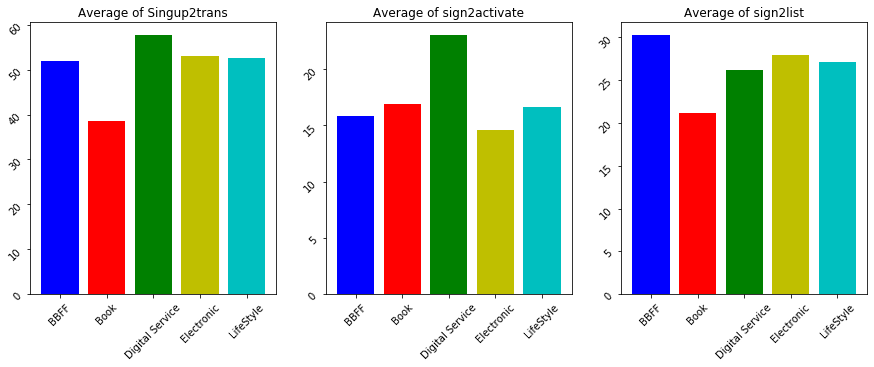

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
ax1.bar(average_data_signup2trans["Seller\'s Vertical"], average_data_signup2trans["Average of signup2trans"].values, color = ['b', 'r', 'g', 'y', 'c'])
ax1.tick_params(labelrotation=45)
ax1.set_title('Average of Singup2trans')
ax2.bar(average_data_sign2activate["Seller\'s Vertical"], average_data_sign2activate["Average of sign2activate"].values, color = ['b', 'r', 'g', 'y', 'c'])
ax2.tick_params(labelrotation=45)
ax2.set_title('Average of sign2activate')
ax3.bar(average_data_sign2list["Seller\'s Vertical"], average_data_sign2list["Average of sign2list"].values, color = ['b', 'r', 'g', 'y', 'c'])
ax3.tick_params(labelrotation=45)
ax3.set_title('Average of sign2list')

See from above data, we noticed that  Average of Sign2Transaction is <font color=red>**51.8 days**</font>, <font color=blue>**Book**</font> having the best lead time from Sign2Transaction but Signup2Activation is <font color=blue>**slightly higher**</font> than Average.
<font color=blue>**Digital Service**</font> is <font color=red>**the worst**</font> in opposite as this category impacted by longest lead time of Signup2Activation. 
=> TIKI need to consider lead time of registration approval for Digital Service ( why it takes too long than others ?  Are there anyway to improve this better ?....) and should priority for Book actived earlier 
<font color=blue>**BBFF 's**</font> whole of standard lead time ( Signup2Transaction) is approximately in average but it is <font color=red>**taking longest**</font> time to list than other categories
=> Seller of BBFF need focus on lead time of listing product to get 1st transaction earlier once sign-up step completed

In [14]:
# Calculate Average of activate2list
data_activate2list = data_df[["Seller\'s Vertical", "activate2list"]]
print("Average of activate2list for all category: ", round(data_activate2list["activate2list"].mean(), 1))
def data_activate2list_level(num_day):
    if num_day < 0:
        return "TIKI should improve"
    elif num_day >= 0 and num_day <= 12:
        return "Standard time range"
    else:
        return "TIKI should support seller to list"
data_activate2list["data_activate2list_level"] = data_activate2list["activate2list"].apply(data_activate2list_level)
data_activate2list_level = data_activate2list[['activate2list', 'data_activate2list_level']].groupby(by=["data_activate2list_level"]).size()
data_activate2list_level
# print("-"*50)
# print("Average of sign2activate for each category")
# average_data_activate2list = data_activate2list.groupby(by=["Seller\'s Vertical"]).mean().reset_index()
# average_data_activate2list = average_data_activate2list.rename(columns = {"activate2list": "Average of activate2list"})
# average_data_activate2list["Average of activate2list"] = average_data_activate2list["Average of activate2list"].apply(lambda x: round(x, 1))
# average_data_activate2list

Average of activate2list for all category:  12.1


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


data_activate2list_level
Standard time range                   1001
TIKI should improve                    424
TIKI should support seller to list     720
dtype: int64

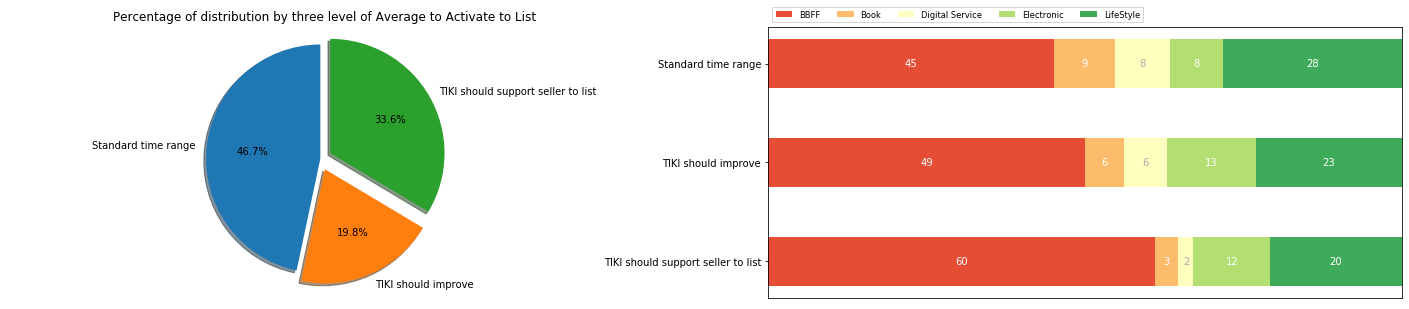

In [15]:
import numpy as np
category_names = list(set(data_activate2list["Seller\'s Vertical"].values))
tiki_improve_value = data_activate2list[data_activate2list["data_activate2list_level"] == "TIKI should improve"].filter(["Seller\'s Vertical", "activate2list"]).groupby(by=["Seller\'s Vertical"]).size()
category_names = tiki_improve_value.index.values
tiki_improve_value = [ round(i/sum(tiki_improve_value)*100, 2) for i in tiki_improve_value]
tiki_standard_value = data_activate2list[data_activate2list["data_activate2list_level"] == "Standard time range"].filter(["Seller\'s Vertical", "activate2list"]).groupby(by=["Seller\'s Vertical"]).size()
tiki_standard_value = [ round(i/sum(tiki_standard_value)*100, 2) for i in tiki_standard_value]
seller_improve_value = data_activate2list[data_activate2list["data_activate2list_level"] == "TIKI should support seller to list"].filter(["Seller\'s Vertical", "activate2list"]).groupby(by=["Seller\'s Vertical"]).size()
seller_improve_value = [ round(i/sum(seller_improve_value)*100, 2) for i in seller_improve_value]
results = {
    "TIKI should improve": tiki_improve_value,
    "Standard time range": tiki_standard_value,
    "TIKI should support seller to list": seller_improve_value}

def survey(results, category_names, data_activate2list_level):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, (ax1, ax) = plt.subplots(ncols=2, figsize=(25, 5))
    # -------------------------------------------------------------
    labels = data_activate2list_level.index.values
    sizes = [i/sum(data_activate2list_level.values)*100 for i in data_activate2list_level.values]
    explode = (0, 0.1, 0.1)
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title('Percentage of distribution by three level of Average to Activate to List')
    
    # -------------------------------------------------------------
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
#     ax.set_title("Percentation by each category of three level")

    return fig, ax


survey(results, category_names, data_activate2list_level)
plt.show()

Based on data provided, we found the detail as below
+ <font color=red>**≈20%**</font> Seller ID having Listing time < Activation time  -> TIKI should improve lead time of registration approval 
+ <font color=red>**≈46%**</font> Listing time of Seller ID in standard time range ->  can be applicable
+ <font color=red>**≈34%**</font> Seller ID take long time to list product -> TIKI should  support for Seller ID
=> Almost  improvement <font color=red>**34%**</font> must come from listing product 's lead time of Seller, especially BBFF because it account for more than 50% of total sellers in TIKI marketplace and getting longest time for listing (30.2 days). Next is Lifestyle ,  Electronic  then Digital Servie & Book accordingly . In addition to, TIKI should  improve lead time of registration approval  for BBFF  then LifeStyle, Book, Digital Service & Electronics in order priority. Anyway, this will contribute <font color=red>**≈20%**</font> improvement to get 1st transaction as well

### 3. Conclusion

In general, 1st transaction depend on Activation time and Listing product time. These 2 actions can do in parallel after seller complete sign-up step. 